In [0]:
#filer FIR
from __future__ import division
from scipy import signal, fft, ifft
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show
import numpy as np
import matplotlib.pyplot as plt

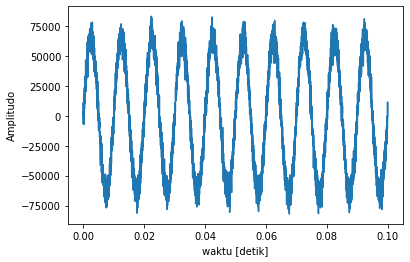

In [15]:
# membangun sebuah sinyal yn
freq = 100 # in Hz 
sampling_freq = 50000 # in Hz
periods = 10 # Number of periods to be printed
amplitude = 2**16

np.random.seed(1234) # needed for adding jitter

x = np.arange(0,periods/freq, 1/sampling_freq)  # x-axis construction

total_samples = len(x)

y = amplitude * (np.sin(2*np.pi*freq*x) + 0.1*np.random.randn(x.size))  # y-axis construction
plt.ylabel("Amplitudo")
plt.xlabel("waktu [detik]")
plt.plot(x,y)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """Entry point for launching an IPython kernel.


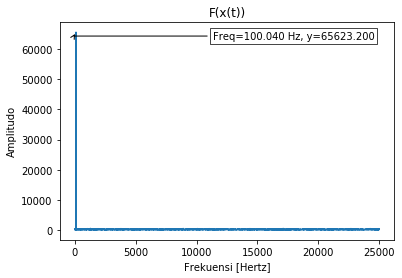

In [16]:
#Transformasi furier cepat
fft_signal = fft(y)

freq_range = total_samples/2  # We are interested in 1-half of the frequency spectrum

xfreq = np.linspace(0,sampling_freq/2, freq_range)
fft_signal_abs = (2/total_samples)*abs(fft_signal[:int(freq_range)])
plt.title("F(x(t))")
plt.ylabel("Amplitudo")
plt.xlabel("Frekuensi [Hertz]")
plt.plot(xfreq,fft_signal_abs) # 2/N normalization

# Fucntion for finding the peak frequency
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "Freq={:.3f} Hz, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)
    
annot_max(xfreq,fft_signal_abs)

#plt.show()


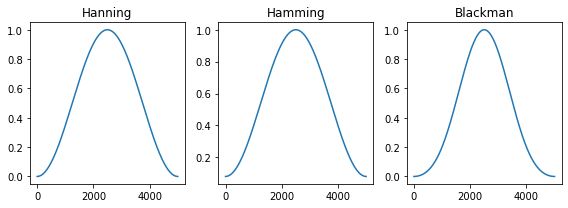

In [5]:
#windowing
hann = np.hanning(len(y))
hamm = np.hamming(len(y))
black= np.blackman(len(y))

plt.figure(figsize=(8,3))
plt.subplot(131)
plt.plot(hann)
plt.title('Hanning')
plt.subplot(132)
plt.plot(hamm)
plt.title('Hamming')
plt.subplot(133)
plt.plot(black)
plt.title('Blackman')
plt.tight_layout()

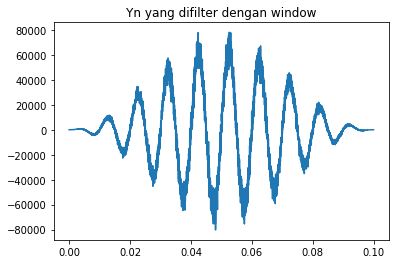

In [17]:
# sinyal y difilter dengan window jenis hanning
windowed_y = y*hann
plt.plot(x,windowed_y)
plt.title('Yn yang difilter dengan window')
plt.show()

In [0]:
#Desain FIR
fir_order = 100                 # Filter Order
cutoff_hz = 50                # The cutoff frequency of the filter.
fir_length = fir_order + 1     # Filter Length

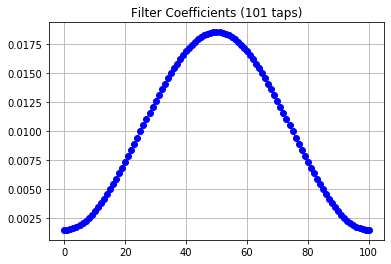

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 432x288 with 0 Axes>

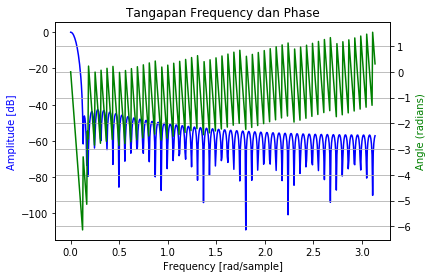

In [10]:
# Use firwin with a Kaiser window to create a lowpass FIR filter.
nyq_rate = sampling_freq / 2.0  # The Nyquist rate of the signal.

taps = firwin(fir_length, cutoff_hz/nyq_rate)

figure(1)
plot(taps, 'bo-', linewidth=1)
title('Filter Coefficients (%d taps)' % len(taps))
grid(True)
plt.show()
#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------
w, h = freqz(taps) # w = Frequencies in unit of fs.  w is normalized to the range [0, pi) (radians/sample).
                   # h = The frequency response, as complex numbers
figure(2)
clf() # Clear the current figure

fig = plt.figure()
plt.title('Tangapan Frequency dan Phase')

ax1 = fig.add_subplot(111)
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

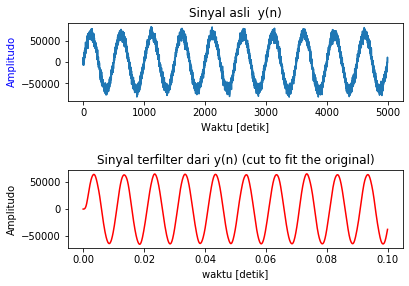

In [14]:
#Konvolusi antara yn dengan filter FIR
# Use lfilter to filter x with the FIR filter.
# filtered_y = lfilter(taps, 1, y)     # This returns len(y) number of samples
filtered_y = np.convolve(y,taps)    # This returns len(y) + filter_order-1 number of samples

plt.subplot(2, 1, 1)
plt.title('Sinyal asli  y(n)')
plt.ylabel('Amplitudo', color='b')
plt.xlabel('Waktu [detik]')
plot(y)

plt.subplot(2, 1, 2)

plt.subplots_adjust(hspace = 0.9, bottom=0.1 )
plt.title('Sinyal terfilter dari y(n) (cut to fit the original)')
plot(x,filtered_y[:len(x)], 'r')
plt.ylabel('Amplitudo')
plt.xlabel('waktu [detik]')

plt.show()